In [11]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
col_names = ['FL_DATE', 'AIRLINE', 'AIRLINE_DOT',
                          'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN',
                          'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME',
                          'ARR_TIME', 'CANCELLED', 'ELAPSED_TIME', 'DISTANCE',
                          'DELAY_DUE_WEATHER', 'temperature_2m', 'relative_humidity_2m',
                          'dew_point_2m', 'apparent_temperature', 'rain', 'snowfall',
                          'pressure_msl', 'surface_pressure', 'vapour_pressure_deficit',
                          'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
                          'wind_direction_100m', 'wind_gusts_10m', 'DELAY_OR_CANCEL']

df_clean = pd.read_csv("testing_data.csv", header=None, names=col_names, low_memory = False)
#df_clean = pd.read_csv("testing_data_real.csv", header=None, names=col_names, low_memory = False)
#df_clean = pd.read_csv("merged_data.csv", header=None, names=col_names, low_memory = False)
#df_clean.to_csv("im_broken.csv", index=True)

print(df_clean.columns)
df_clean.head()

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'ARR_TIME', 'CANCELLED', 'ELAPSED_TIME', 'DISTANCE',
       'DELAY_DUE_WEATHER', 'temperature_2m', 'relative_humidity_2m',
       'dew_point_2m', 'apparent_temperature', 'rain', 'snowfall',
       'pressure_msl', 'surface_pressure', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'DELAY_OR_CANCEL'],
      dtype='object')


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,snowfall,pressure_msl,surface_pressure,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,DELAY_OR_CANCEL
0,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,snowfall,pressure_msl,surface_pressure,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,DELAY_OR_CANCEL
1,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,1019.0,987.7932739257812,0.0929093360900878,13.89618682861328,22.8847885131836,16.557161331176758,19.290138244628903,29.8799991607666,0.0
2,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",...,0.0,1010.7000122070312,1010.34423828125,0.5805352926254272,6.92473840713501,18.47259521484375,207.8971710205078,213.0706787109375,14.399999618530272,0.0
3,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",...,0.0,1025.699951171875,1022.31298828125,0.132944107055664,10.308830261230469,22.47334289550781,294.7751159667969,305.2176818847656,16.559999465942383,0.0
4,2023-04-15,Republic Airline,Republic Airline: YX,YX,20452,3615,MSP,"Minneapolis, MN",EWR,"Newark, NJ",...,0.0,1008.0,977.91748046875,0.0463694334030151,8.766572952270508,15.716793060302734,340.8208923339844,339.9046630859375,27.35999870300293,0.0


In [13]:
df_clean['DELAY_DUE_WEATHER'] = df_clean['DELAY_DUE_WEATHER'].fillna(0)
df_clean['ARR_TIME'] = df_clean['ARR_TIME'].fillna(0)
df_clean['ELAPSED_TIME'] = df_clean['ELAPSED_TIME'].fillna(0)

#df_clean = df.dropna(0)

empty_cells = df_clean.isna()

num_empty_cells = empty_cells.sum().sum()
print(f"Number of empty cells in the DataFrame: {num_empty_cells}")

df_clean.to_csv("df_clean.csv", index=False)

Number of empty cells in the DataFrame: 0


In [14]:
columns_to_convert = ['temperature_2m', 'relative_humidity_2m', 'ELAPSED_TIME',
                          'dew_point_2m', 'apparent_temperature', 'rain', 'snowfall',
                          'pressure_msl', 'CANCELLED', 'surface_pressure', 'vapour_pressure_deficit',
                          'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
                          'wind_direction_100m', 'wind_gusts_10m', 'DELAY_OR_CANCEL']

# Use pd.to_numeric() to convert selected columns to float
df_clean[columns_to_convert] = df_clean[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='float')

In [15]:
#'AIRLINE','ORIGIN_CITY', 'DEST_CITY', 

feature_cols = ['AIRLINE','ORIGIN_CITY', 'DEST_CITY', 'temperature_2m', 'relative_humidity_2m',
                          'dew_point_2m', 'apparent_temperature', 'rain', 'snowfall',
                          'pressure_msl', 'surface_pressure', 'vapour_pressure_deficit',
                          'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
                          'wind_direction_100m', 'wind_gusts_10m']
df_clean = df_clean.dropna(0)
X = df_clean[feature_cols] # Features
y = df_clean['DELAY_OR_CANCEL']# Target variable
df_clean.head()
print("This is X: ", X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42) # 70% training and 30% test

column_info = pd.DataFrame({
    'Column Name': df_clean.columns,
    'Data Type': df_clean.dtypes
})

print(column_info)

empty_cells = df_clean.isna()

num_empty_cells = empty_cells.sum().sum()
print(f"Number of empty cells in the DataFrame: {num_empty_cells}")

C:\Users\dansh\AppData\Local\Temp\ipykernel_11728\1502696367.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df_clean = df_clean.dropna(0)


This is X:                         AIRLINE        ORIGIN_CITY          DEST_CITY  \
1         Delta Air Lines Inc.    Minneapolis, MN  San Francisco, CA   
2       American Airlines Inc.     Washington, DC         Boston, MA   
3             Spirit Air Lines        Houston, TX    Los Angeles, CA   
4             Republic Airline    Minneapolis, MN         Newark, NJ   
5        United Air Lines Inc.         Austin, TX        Houston, TX   
...                        ...                ...                ...   
502483         JetBlue Airways  San Francisco, CA       New York, NY   
502484    Delta Air Lines Inc.         Tucson, AZ        Atlanta, GA   
502485         JetBlue Airways         Boston, MA          Miami, FL   
502486   SkyWest Airlines Inc.         Boston, MA      Milwaukee, WI   
502487   United Air Lines Inc.         Denver, CO   Indianapolis, IN   

        temperature_2m  relative_humidity_2m  dew_point_2m  \
1             0.626000             85.513451     -1.524000   

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#clf = DecisionTreeClassifier()

#clf = clf.fit(X_train_enc,y_train)

#y_pred = clf.predict(X_test)

# Assuming categorical_columns is a list of categorical column names
categorical_columns = ['AIRLINE','ORIGIN_CITY', 'DEST_CITY']  

# Create a column transformer with one-hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and the DecisionTreeClassifier
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('DTclassifier', DecisionTreeClassifier())
])
#('KNNclassifier', KNeighborsClassifier()
#('GBclassifier', GradientBoostingClassifier(random_state=42))
#('RFclassifier', RandomForestClassifier(random_state=42)) 
#('SVMclassifier', SVC(random_state=42))

# Fit and predict
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [8]:
#Decision Tree Score

from sklearn.model_selection import cross_val_score

print('y_pred:   ', y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

scores = cross_val_score(clf, X, y, cv=10)
print(scores)

y_pred:    [0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.872077056259826
[0.86451472 0.8596589  0.86483313 0.86763916 0.85358913 0.8597385
 0.85629565 0.85625299 0.85529772 0.85915857]


In [105]:
#Random_Forest_Score

from sklearn.model_selection import cross_val_score

print('y_pred:   ', y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

scores = cross_val_score(clf, X, y, cv=10)
print(scores)

y_pred:    [0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.9167247109395212
[0.90811757 0.90561006 0.91120221 0.91251567 0.90135127 0.90491353
 0.8996796  0.90047365 0.89892135 0.9027822 ]


In [7]:
#KNN Score

from sklearn.model_selection import cross_val_score

print('y_pred:   ', y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

scores = cross_val_score(clf, X, y, cv=10)
print(scores)

y_pred:    [0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.9054508547433779
[0.90298314 0.89719198 0.90471452 0.90559016 0.8887341  0.89679397
 0.8930526  0.89115985 0.89235392 0.89589635]


In [13]:
#GBclassifier Score

from sklearn.model_selection import cross_val_score

print('y_pred:   ', y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

scores = cross_val_score(clf, X, y, cv=10)
print(scores)

y_pred:    [0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.8999184063364445
[0.90216721 0.89675416 0.9041971  0.90270453 0.89816713 0.89896316
 0.89271428 0.89386642 0.89334899 0.89271215]


In [7]:
#DecisionTree

from sklearn.model_selection import GridSearchCV

# Assuming X_train and y_train are your training data
# Define the hyperparameters and their possible values
param_grid = {
    'DTclassifier__criterion': ['gini', 'entropy'],
    'DTclassifier__max_depth': [None, 5, 10, 15, 20, 25, 30],
    'DTclassifier__min_samples_split': [2, 5, 7, 10],
    'DTclassifier__min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Parameters:  {'DTclassifier__criterion': 'gini', 'DTclassifier__max_depth': 15, 'DTclassifier__min_samples_leaf': 2, 'DTclassifier__min_samples_split': 2}
Best Accuracy:  0.9073283081074555


In [9]:
#Random Forest

from sklearn.model_selection import GridSearchCV

param_grid = {
    'RFclassifier__n_estimators': [50, 100, 200],
    'RFclassifier__max_depth': [None, 10, 20, 30],
    'RFclassifier__min_samples_split': [2, 5, 10],
    'RFclassifier__min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Parameters:  {'RFclassifier__max_depth': None, 'RFclassifier__min_samples_leaf': 1, 'RFclassifier__min_samples_split': 2, 'RFclassifier__n_estimators': 200}
Best Accuracy:  0.9169604159218581


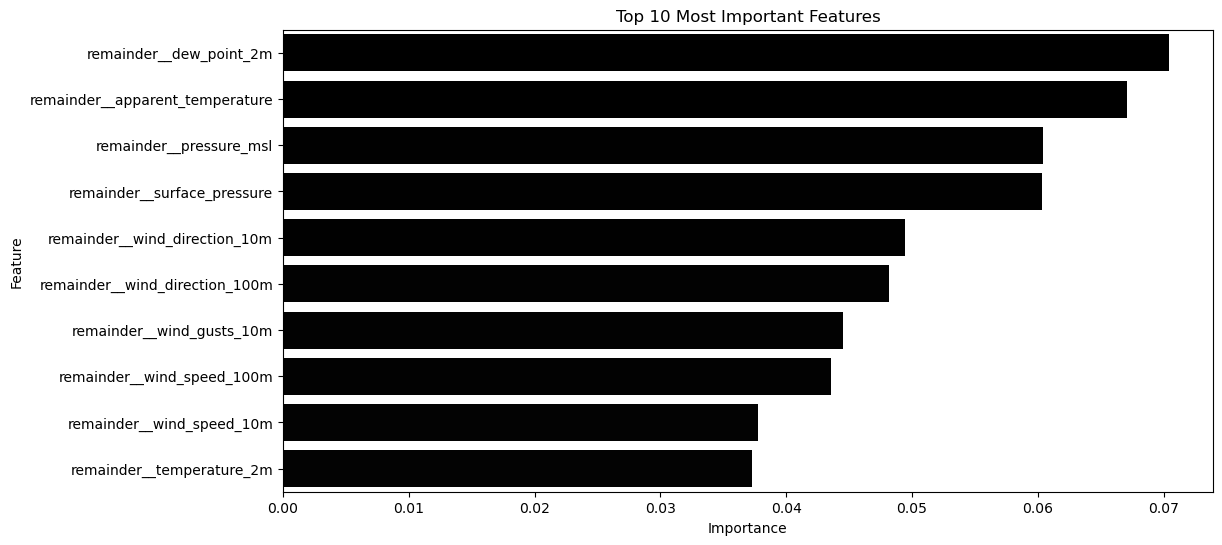

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'clf' is your trained model and 'feature_cols' are your feature columns
importances = clf.named_steps['DTclassifier'].feature_importances_
feature_names = clf.named_steps['preprocessor'].get_feature_names_out(input_features=feature_cols)

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Number of top features to display
top_n = 10

# Set a color palette (e.g., using a single color)
color_palette = sns.color_palette("gray", len(feature_importance_df))

# Plot top N most important features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n), palette=color_palette)
plt.title('Top {} Most Important Features'.format(top_n))
plt.show()

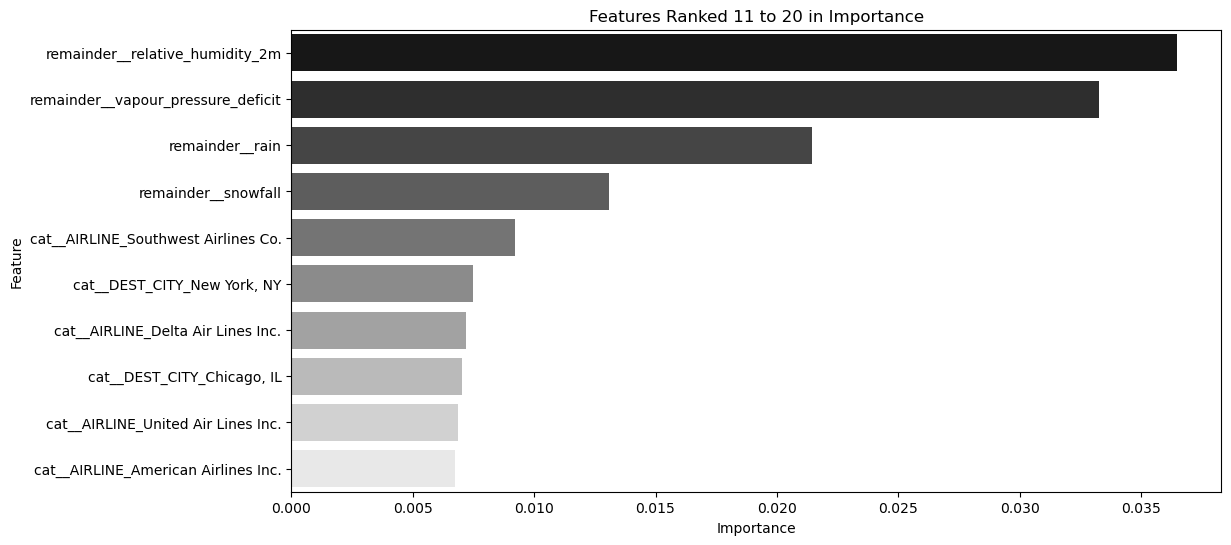

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'clf' is your trained model and 'feature_cols' are your feature columns
importances = clf.named_steps['DTclassifier'].feature_importances_
feature_names = clf.named_steps['preprocessor'].get_feature_names_out(input_features=feature_cols)

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select features 11 to 20
selected_features = feature_importance_df.iloc[10:20]

# Set a color palette (e.g., using a single color)
color_palette = sns.color_palette("gray", len(selected_features))

# Plot features 11 to 20
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=selected_features, palette=color_palette)
plt.title('Features Ranked 11 to 20 in Importance')
plt.show()
